In [120]:
#https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset
# Project Loading and Displaying
# Data Cleaning
# Descriptive Statistics
# Feature Engineering for Cleaning
# Data Export
# Visualization By Tableau
# Insights

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [121]:
#read dataset
bil_stat = pd.read_csv('billionaires_stat_dataset.csv')
#bill_stat is DataFrame type

In [122]:
#sample data
bil_stat.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [123]:
#check shape of the dataFrame
bil_stat.shape

(2640, 35)

In [124]:
#print column names
bil_stat.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [125]:
#check to see if there is any null value of each column
bil_stat.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [126]:
#total networth of all billionaires
print("Total net worth: " + str(bil_stat['finalWorth'].sum()) + " Billion")

Total net worth: 12206800 Billion


Total Female net worth:  1540200
Total Male net worth:  10666600


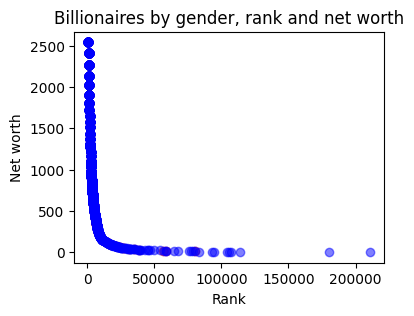

In [135]:
#total net worth by gender
net_gender = bil_stat[['gender', 'finalWorth', 'rank']]
print("Total Female net worth: ", net_gender[net_gender['gender'] == 'F']['finalWorth'].sum())
print("Total Male net worth: ", net_gender[net_gender['gender'] == 'M']['finalWorth'].sum())

color_map = {'F': 'red', 'M': 'blue'}

plt.figure(figsize=(4,3))
#plot scatter graphic
# plt.scatter(net_gender['finalWorth'], net_gender['rank'], c=net_gender['gender'].map(color_map), marker='o', s=10)

#another way to do scatter - loop through each row
for key, group in bil_stat.groupby('gender'):
    plt.scatter(group['finalWorth'], group['rank'], c=color_map[key], label=key, alpha=0.5)

plt.xlabel('Rank')
plt.ylabel('Net worth')
plt.title('Billionaires by gender, rank and net worth')

plt.show()

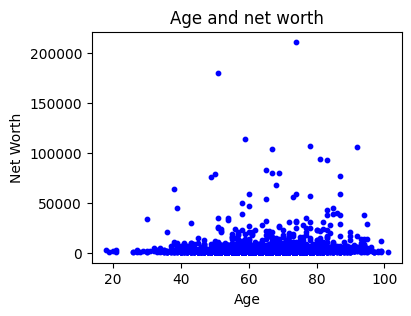

In [128]:
#relation between age and networth.
#using histogram plot
age_net = bil_stat[['age', 'finalWorth']]
plt.figure(figsize=(4,3))
plt.scatter(x = age_net['age'], y = age_net['finalWorth'], s = 10, color = color_map[key])
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Age and net worth')
plt.show()

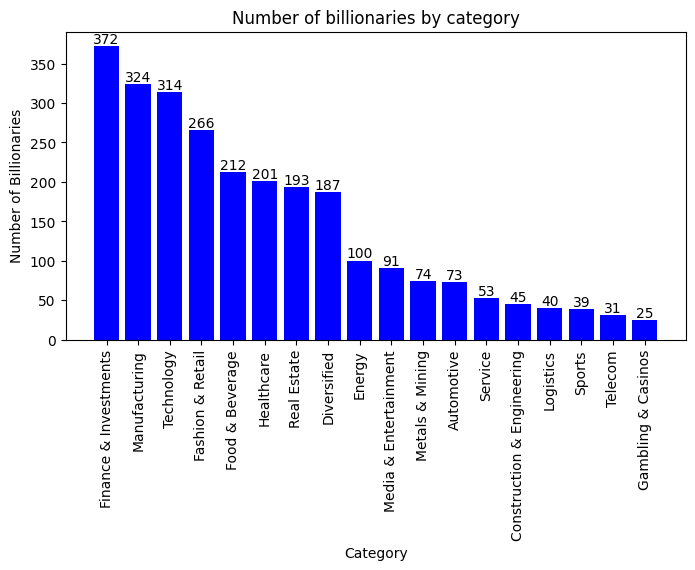

In [162]:
#count the number of billionaries by category (industry)
count_category = bil_stat['category'].value_counts()

plt.figure(figsize=(8,4))
bars = plt.bar(count_category.index, count_category.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Number of Billionaries')
plt.xticks(rotation='vertical') #rotating x-axis labels verticaly
plt.title('Number of billionaries by category')
# Adding values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

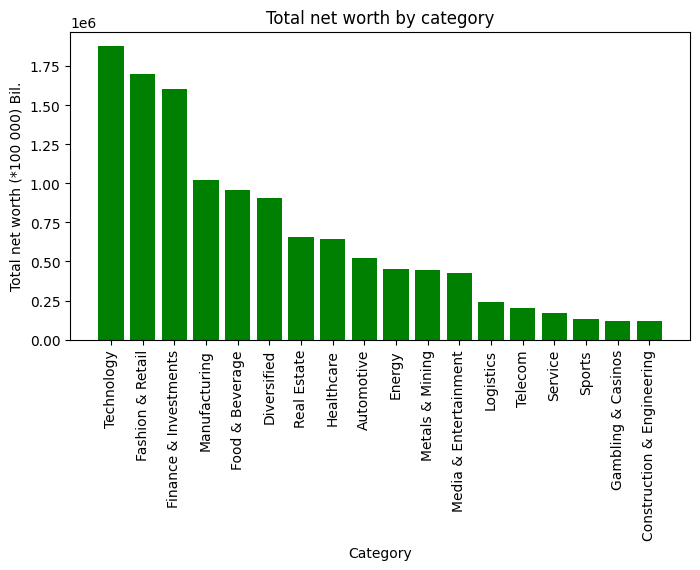

In [167]:
# get the net worth for each category
total_net_category = bil_stat.groupby('category')['finalWorth'].sum().sort_values(ascending=0)

plt.figure(figsize=(8,4))
plt.bar(total_net_category.index, total_net_category.values, color='green')
plt.xlabel('Category')
plt.ylabel('Total net worth (*100 000) Bil.')
plt.xticks(rotation='vertical')
plt.title('Total net worth by category')
plt.show()

In [131]:
#total networth by category, country, gender, selfmade

In [132]:

#youngest, oldest billionaires

#are there billionaires from the same family (same country and last name)

In [ ]:
#ratio of networth to country's gdp